In [1]:
pip install tensorflow-gpu===2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import files
uploaded=files.upload()

Saving SalesData.csv to SalesData (2).csv


In [0]:
import io
df2= pd.read_csv(io.BytesIO(uploaded['SalesData.csv']))

In [6]:
df2

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [0]:
x_train, x_test, y_train, y_test= train_test_split(df2['Temperature'],df2['Revenue'],test_size=0.2)

In [8]:
x_train.shape

(400,)

In [0]:
x_train= np.reshape(np.array(x_train),(-1,1))
x_test= np.reshape(np.array(x_test),(-1,1))
y_train= np.reshape(np.array(y_train),(-1,1))
y_test= np.reshape(np.array(y_test),(-1,1))

In [10]:
x_train.shape

(400, 1)

In [11]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
epochs_hist=model.fit(x_train, y_train, epochs=1000)

Train on 400 samples
Epoch 1/1000
400/400 [==============================] - 1s 1ms/sample - loss: 319239.6900
Epoch 2/1000
400/400 [==============================] - 0s 68us/sample - loss: 283997.9962
Epoch 3/1000
400/400 [==============================] - 0s 68us/sample - loss: 252365.0956
Epoch 4/1000
400/400 [==============================] - 0s 68us/sample - loss: 222652.5862
Epoch 5/1000
400/400 [==============================] - 0s 61us/sample - loss: 195760.4956
Epoch 6/1000
400/400 [==============================] - 0s 60us/sample - loss: 171600.9675
Epoch 7/1000
400/400 [==============================] - 0s 63us/sample - loss: 149645.8662
Epoch 8/1000
400/400 [==============================] - 0s 60us/sample - loss: 130164.8381
Epoch 9/1000
400/400 [==============================] - 0s 56us/sample - loss: 112256.5350
Epoch 10/1000
400/400 [==============================] - 0s 65us/sample - loss: 96898.9356
Epoch 11/1000
400/400 [==============================] - 0s 59us/sampl

In [13]:
model.get_weights()

[array([[21.58996]], dtype=float32), array([41.398506], dtype=float32)]

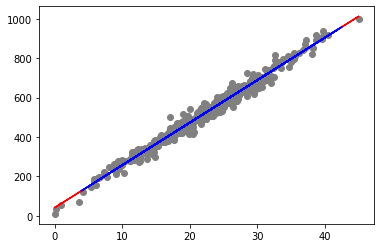

In [14]:
plt.scatter(x_train, y_train, color='gray')
plt.plot(x_train, model.predict(x_train), color='red')
plt.plot(x_test,model.predict(x_test), color='blue')

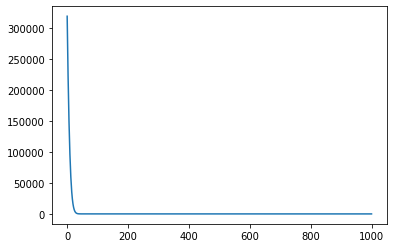

In [15]:
plt.plot(epochs_hist.history['loss'])

In [17]:
m_tr=x_train.shape[0]
final_tr_pred=model.predict(x_train)
cost=(1/m_tr)*np.sum((y_train-final_tr_pred)**2)
print('training_error', cost)

training_error 613.4714886134524


In [19]:
m_tt=x_test.shape[0]
final_tt_pred=model.predict(x_test)
cost=(1/m_tt)*np.sum((y_test-final_tt_pred)**2)
print('testing_error', cost)

testing_error 668.7610215855626
